In [1]:
# 모듈 로딩
import os
import cv2
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from PIL import Image
from bs4 import BeautifulSoup
from selenium import webdriver
from tensorflow.keras import Sequential
from sklearn.utils import all_estimators
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from urllib.request import urlopen,Request,urlretrieve
from tensorflow.keras.utils import set_random_seed, plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D

In [2]:
# 크롤링 데이터 로테이션시키는 함수
def rota_save(color,foldname):
    # 폴더 만들기
    if not os.path.exists('./'+foldname):
        os.makedirs(foldname)
    
    rotation=[45,90,135,180,225,270,315]
    for file in os.listdir('./data/'):
        for rot in rotation:
            img=np.array(Image.open('./data/'+file).convert(color))
            rows,cols = img.shape[0:2]
            ro_mt = cv2.getRotationMatrix2D((cols/2,rows/2),rot,1.42)
            ro_img = cv2.warpAffine(img, ro_mt,(cols, rows))
            
            # 이미지 저장
            filename=f"{file}_ro{str(rot)}"
            cv2.imwrite('./'+foldname+'/'+filename+'.png',ro_img)

In [3]:
# 크롤링 데이터 convert 함수
def data_con(color,foldname):
    for file in os.listdir('./data/'):
        img=Image.open('./data/'+file).convert(color).save('./'+foldname+'/'+file)

In [4]:
# 흑백으로 로테이션
rota_save('L','blwh')

# rgb로 로테이션
rota_save('RGB','rgb')

In [5]:
# 원본사진 흑백으로
data_con('L','blwh')

# 원본사진 색깔로
data_con('RGB','rgb')

In [6]:
def solution(foldname):
    l=[]
    for i in os.listdir('./'+foldname+'/'):
        n=np.array(Image.open('./'+foldname+'/'+i))/255.0
        if foldname=='blwh':
           n_list=n.reshape(-1,50,50)[0].tolist()
        else:
            n_list=n.reshape(-1,50,50,3)[0].tolist()
        l.append(n_list)
    return np.array(l)

In [7]:
# 동적 웹 크롤링으로 사진저장 함수
def image_save(urlpath,charname):
    driver = webdriver.Chrome('chromedriver.exe') # C:/Users/User/EXAM_PANDAS/DAY-0630/DAY-0920
    #driver = webdriver.Chrome('C:\\workspace’) # Windows 사용자의 설치 경로
    driver.get(urlpath)
    html=driver.page_source
    soup=BeautifulSoup(html,'html.parser')
    driver.quit()

    # 태그-속성 찾기
    image_finds=soup.select("div.bRMDJf img")
    
    # 이미지의 url찾기
    image=[]
    for image_find in image_finds:
        try:
            image.append(image_find['src'])
            image.append(image_find['data-src'])
        except:
            pass
    
    # 폴더 만들기
    if not os.path.exists('./trashdata'+charname):
        os.makedirs('./trashdata'+charname)
    
    # 파일 저장하기
    for i in range(0,len(image)):
        urlretrieve(image[i],'./trashdata'+charname+'/'+charname+str(i)+'.png')

    # 파일 크기 조절
    for png in os.listdir('./trashdata'+charname):
        Image.open('./trashdata'+charname+'/'+png).resize((50,50)).save('./trashdata'+charname+'/'+png)

In [8]:
# 메탈 쓰레기
image_save('https://www.google.com/search?q=%EB%A9%94%ED%83%88%EC%93%B0%EB%A0%88%EA%B8%B0&sxsrf=ALiCzsYgMTaD8UrBJjZcoXB0ejjjZXE0og:1667533346124&source=lnms&tbm=isch&sa=X&ved=2ahUKEwiisPzlzZP7AhXaNt4KHdZ5DHUQ_AUoAXoECAEQAw&biw=852&bih=946&dpr=1.5','metal')

# 유리 쓰레기
image_save('https://www.google.com/search?q=%EC%9C%A0%EB%A6%AC%EC%93%B0%EB%A0%88%EA%B8%B0&sxsrf=ALiCzsaq14G6Dozn2OoZypk41jDZtJOT7g:1667533415257&source=lnms&tbm=isch&sa=X&ved=2ahUKEwjh-PeGzpP7AhVcl1YBHd5eDegQ_AUoAXoECAIQAw&biw=852&bih=946&dpr=1.5', 'glass')

# 종이 쓰레기
image_save('https://www.google.com/search?q=%EC%A2%85%EC%9D%B4%EC%93%B0%EB%A0%88%EA%B8%B0&sxsrf=ALiCzsYC9L5qJdGyqmMqqjakLIj1HulBow:1667533460827&source=lnms&tbm=isch&sa=X&ved=2ahUKEwiHrNWczpP7AhUGmFYBHVyVBTUQ_AUoAXoECAEQAw&biw=852&bih=946&dpr=1.5', 'paper')

# 플라스틱 쓰레기
image_save('https://www.google.com/search?q=%ED%94%8C%EB%9D%BC%EC%8A%A4%ED%8B%B1%EC%93%B0%EB%A0%88%EA%B8%B0&sxsrf=ALiCzsbGqKr6AF6F6TpdksGB2H7Kl3qI1A:1667533505972&source=lnms&tbm=isch&sa=X&ved=2ahUKEwit0JiyzpP7AhXfrlYBHZSfAi0Q_AUoAXoECAIQAw&biw=852&bih=946&dpr=1.5', 'plastic')

# 음식물 쓰레기
image_save('https://www.google.com/search?q=%EC%9D%8C%EC%8B%9D%EB%AC%BC+%EC%93%B0%EB%A0%88%EA%B8%B0&sxsrf=ALiCzsYd6U9ofgUrESbI6v60-pYMq5hkfQ:1667533565760&source=lnms&tbm=isch&sa=X&ved=2ahUKEwix5tnOzpP7AhVSm1YBHc5wBuQQ_AUoAXoECAIQAw&biw=852&bih=946&dpr=1.5', 'food')

# 건전지 쓰레기
image_save('https://www.google.com/search?q=%EA%B1%B4%EC%A0%84%EC%A7%80+%EC%93%B0%EB%A0%88%EA%B8%B0&sxsrf=ALiCzsb6pS2n5n6mUXzgnSm8ZcFzlaL-SQ:1667533619052&source=lnms&tbm=isch&sa=X&ved=2ahUKEwi2zY7ozpP7AhW_plYBHcylCLMQ_AUoAXoECAEQAw&biw=852&bih=946&dpr=1.5', 'battery')

In [10]:
metal_img = Image.open('./trashdatametal/metal0.png')
glass_img = Image.open('./trashdataglass/glass0.png')
paper_img = Image.open('./trashdatapaper/paper0.png')
plastic_img = Image.open('./trashdataplastic/plastic0.png')
food_img = Image.open('./trashdatafood/food0.png')
battery_img = Image.open('./trashdatabattery/battery0.png')

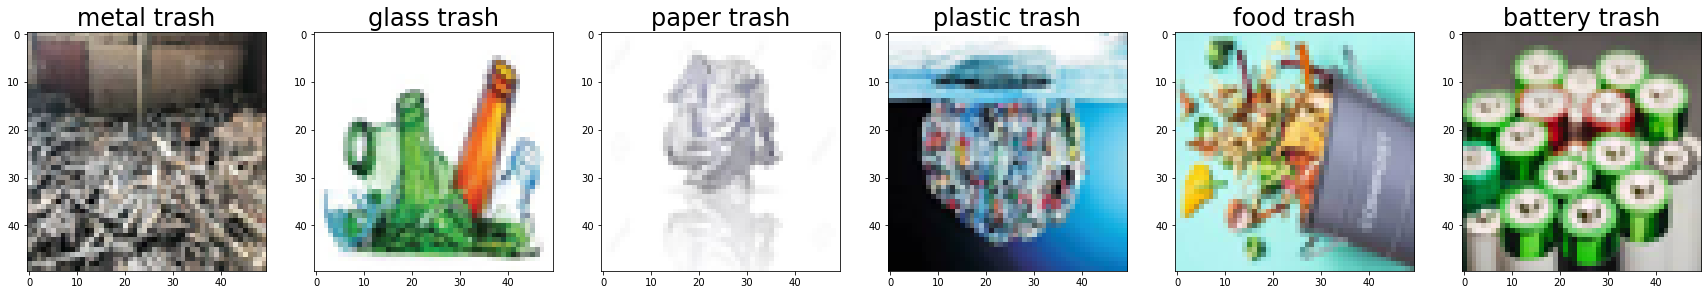

In [11]:
fig=plt.figure(figsize=(30,30))

plt.subplot(1, 6, 1)
plt.imshow(metal_img)
plt.title('metal trash', fontsize=24)

plt.subplot(1, 6, 2)
plt.imshow(glass_img)
plt.title('glass trash', fontsize=24)

plt.subplot(1, 6, 3)
plt.imshow(paper_img)
plt.title('paper trash', fontsize=24)

plt.subplot(1, 6, 4)
plt.imshow(plastic_img)
plt.title('plastic trash', fontsize=24)

plt.subplot(1, 6, 5)
plt.imshow(food_img)
plt.title('food trash', fontsize=24)

plt.subplot(1, 6, 6)
plt.imshow(battery_img)
plt.title('battery trash', fontsize=24)
plt.show()